In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

t = np.arange(0, 11, 1)
k = [0.01, 0.04, 0.08, 0.12, 
     #0.16, 
     #0.2,
]
x = [100, 200, 300, 400, 500, 600]

# Генерація усіх можливих комбінацій
combinations = list(itertools.product(t, k, x))

# Створення датафрейму
df = pd.DataFrame(combinations, columns=["t", "k", "x"])
df['x'] = df['x']*12
df['g']=df['k'] + 1
df['g**t'] = df['g'] ** df['t']
df['s'] = df['x'] * (df['g**t']-1) / df['k']
df['p'] = df['s'] * df['k']
df['pm'] = df['p'] / 12

print(df.head(36))


    t     k     x     g  g**t       s      p    pm
0   0  0.01  1200  1.01  1.00     0.0    0.0   0.0
1   0  0.01  2400  1.01  1.00     0.0    0.0   0.0
2   0  0.01  3600  1.01  1.00     0.0    0.0   0.0
3   0  0.01  4800  1.01  1.00     0.0    0.0   0.0
4   0  0.01  6000  1.01  1.00     0.0    0.0   0.0
5   0  0.01  7200  1.01  1.00     0.0    0.0   0.0
6   0  0.04  1200  1.04  1.00     0.0    0.0   0.0
7   0  0.04  2400  1.04  1.00     0.0    0.0   0.0
8   0  0.04  3600  1.04  1.00     0.0    0.0   0.0
9   0  0.04  4800  1.04  1.00     0.0    0.0   0.0
10  0  0.04  6000  1.04  1.00     0.0    0.0   0.0
11  0  0.04  7200  1.04  1.00     0.0    0.0   0.0
12  0  0.08  1200  1.08  1.00     0.0    0.0   0.0
13  0  0.08  2400  1.08  1.00     0.0    0.0   0.0
14  0  0.08  3600  1.08  1.00     0.0    0.0   0.0
15  0  0.08  4800  1.08  1.00     0.0    0.0   0.0
16  0  0.08  6000  1.08  1.00     0.0    0.0   0.0
17  0  0.08  7200  1.08  1.00     0.0    0.0   0.0
18  0  0.12  1200  1.12  1.00  

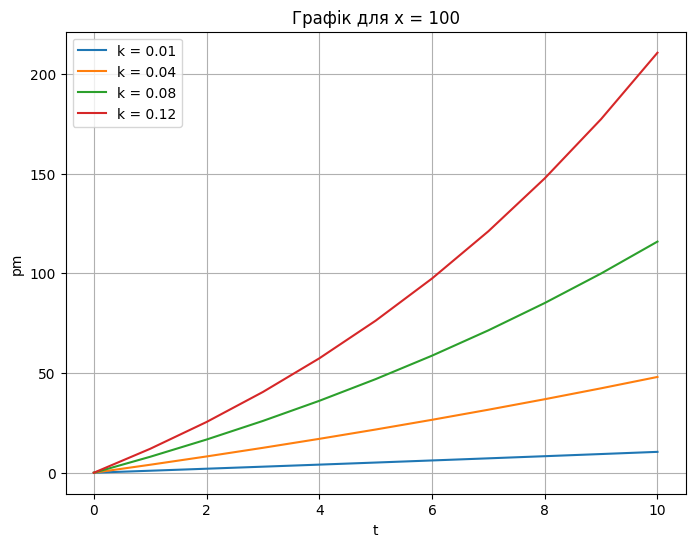

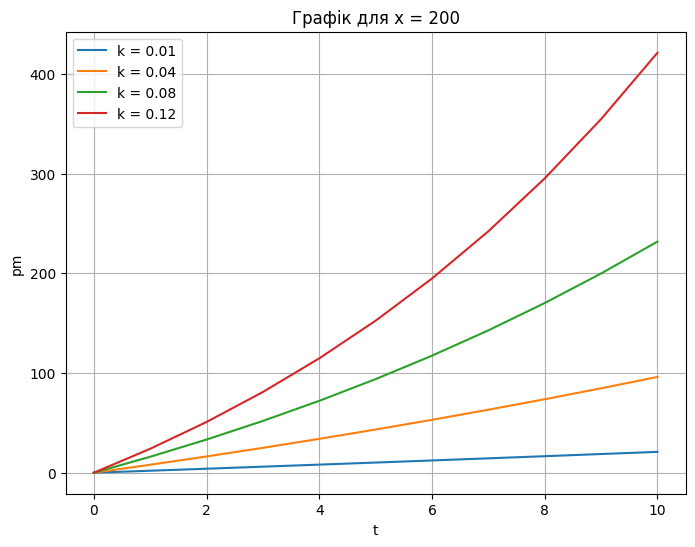

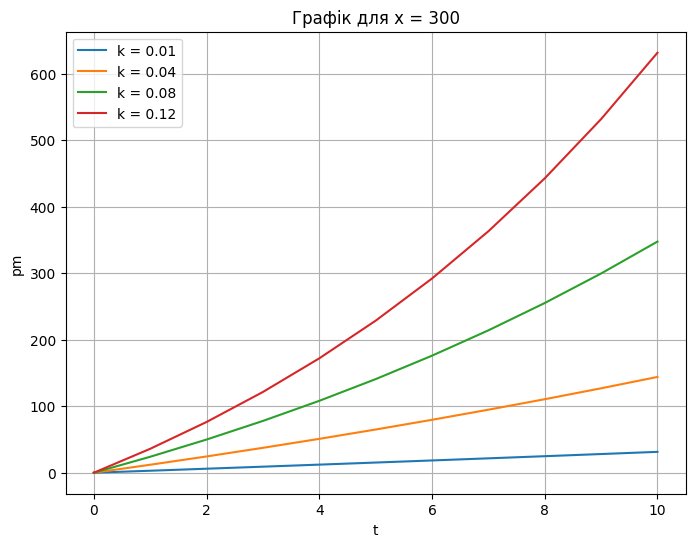

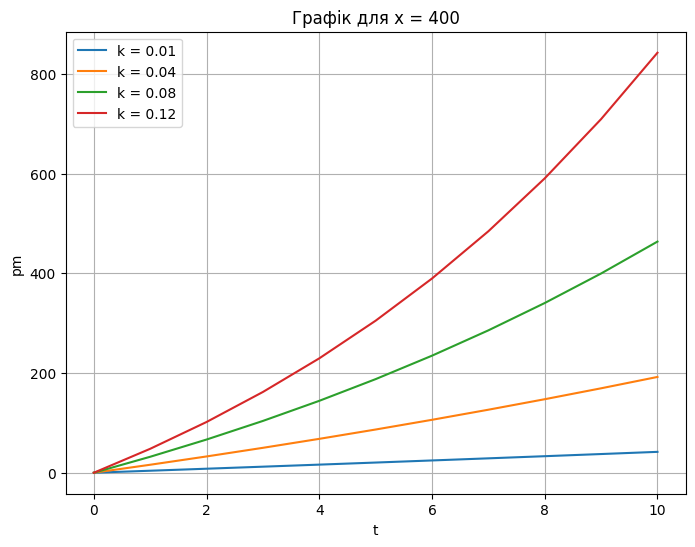

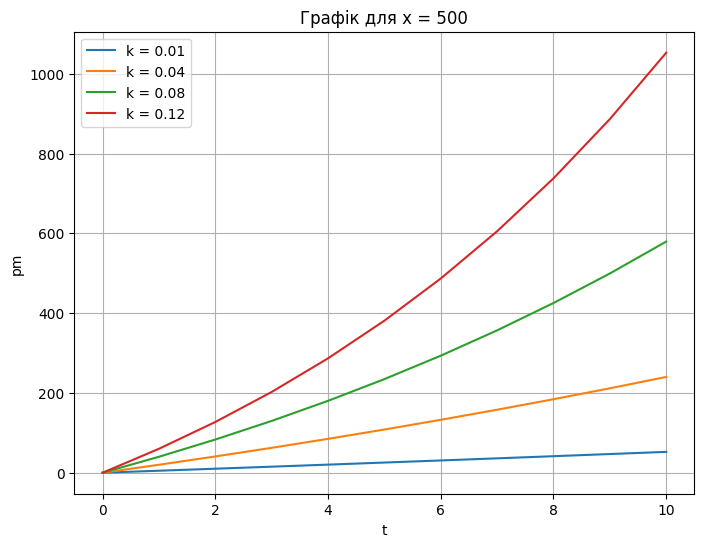

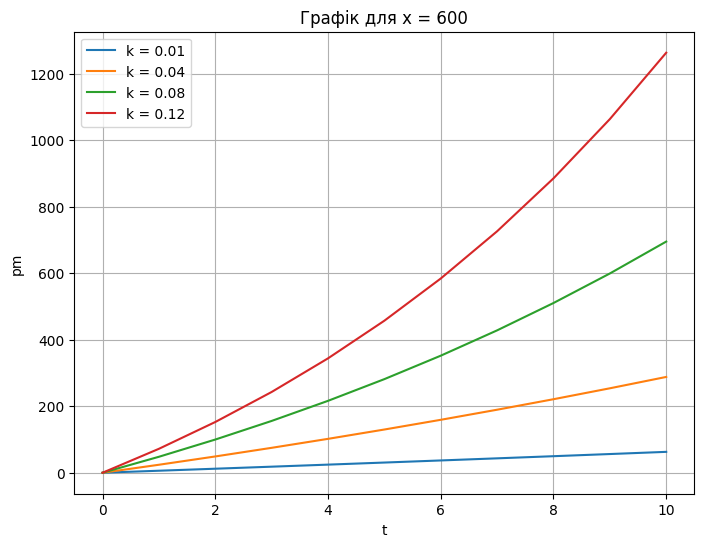

In [2]:
# Побудуємо графіки для кожного значення x
for xi in x:
    plt.figure(figsize=(8, 6))  # Створюємо нову фігуру для кожного x
    subset = df[df["x"] == xi*12]  # Фільтруємо дані для поточного x
    
    # Для кожного значення k будуємо лінію
    for ki in k:
        data = subset[subset["k"] == ki]
        plt.plot(data["t"], data["pm"], label=f'k = {ki}')  # Лінія для конкретного k
    
    plt.title(f'Графік для x = {xi}')
    plt.xlabel('t')
    plt.ylabel('pm')
    plt.legend()  # Додаємо легенду
    plt.grid(True)
    plt.show()